# Data science pipeline: pandas, seaborn, scikit-learn
- Come usare pandas per leggere dati in Python
- Come usare seaborn per visualizzare i dati
- Cos'è la linear regression
- Come allenare e interpretare un modello linear regression in scikit-learn
- Alcuni metodi di valutazione per i problemi di regressione
- Come scegliere quali caratteristiche includere in un modello

## Tipi di supervised learning
- Classificativa: Predire una risposta categorica
- Regressiva: Predire una risposta continua

## Leggere dati usando pandas

In [2]:
# Import pandas
import pandas as pd

In [3]:
#read a CSV file from a URL and save it
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Stampa le prime 5 righe
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Tipi di oggetti primari:
- DataFame: righe e colonne
- Series: una sola colonna

In [4]:
# Stampa le ultime 5 righe
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# controlla la forma del dataframe
data.shape

(200, 4)

    Le caratteristiche sono i soldi spesi (in migliaia di dollari) in pubblicità in quei settori

    Sales: vendite di un prodotto in quel determinato mercato

## Visualizzare i dati con seaborn

In [6]:
# Import seaborn
import seaborn as sns

%matplotlib inline

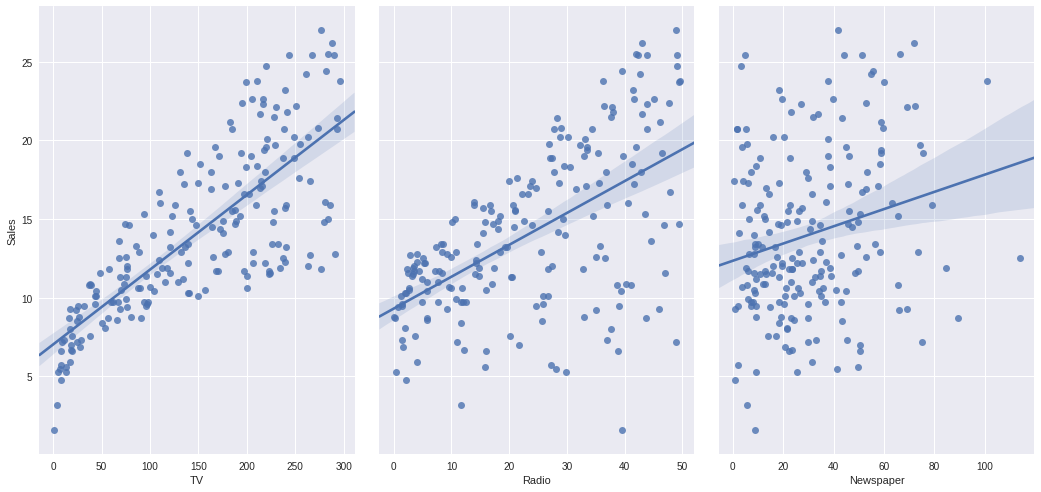

In [7]:
# visualizza la relazione tra caratteristiche e risposte
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], size=7, aspect=0.7, kind='reg')

# Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and the response)

## Prepare X and y using pandas

In [8]:
# create a Python list of feature names
feature_cols = ['TV','Radio','Newspaper']

#use the list to select a subset of the original dataframe
X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# check X's type and shape
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [10]:
y = data.Sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [11]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Dividere X e y in training e testing set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# defaults to 25% for testing and 75% for training

(150, 3)
(50, 3)
(150,)
(50,)


## Linear regression in scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Interpretare coefficienti di modello

In [15]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


    NB. Dati costi di pubblicità per Radio e Giornali, un incremento unitario nei costi TV è associato con un aumento delle vendite di 0.0466.

## Fare predizioni


In [17]:
y_pred = linreg.predict(X_test)

Ora bisogna valutare le predizioni.

## Valutare modelli regressivi
I metodi usati per i problemi di classificazione non sono utili nei problemi di regressione.

Servono metodi di valutazione creati specificatamente per comparare dati continui.

In [18]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**MEAN ABSOLUTE ERROR** (MAE) è la media dei valori assoluti di errore

In [21]:
# Calculate MAE by hand
print((10 + 0 + 20 + 10) / 4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**MEAN SQUARED ERROR** (MSE) è la media del quadrato degli errori.

In [22]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**ROOT MEAN SQUARED ERROR** (RMSE) è la radice quadrata della media del quadrato degli errori.

In [24]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2) / 4))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Compariamo questi metodi:
- **MAE** è il più facile da capire, poiché rappresenta l'errore medio
- **MSE** è più popolare del MAE, poiché penalizza gli errori maggiori.
- **RMSE** è il più popolare dei tre, poiché è interpretabile nelle unità di y.

## Utilizzare l'RMSE per le predizioni delle vendite

In [25]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Selezione delle caratteristiche
Siccome la pubblicità tramite giornale influenza poco le vendite, la rimuoveremo dal modello.

In [26]:
feature_cols = ['TV','Radio']

X = data[feature_cols]

y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


L'errore è diminuito, quindi la scelta di rimuovere le pubblicità tramite giornale dal modello è stata azzeccata, in quanto essa influenza poco le vendite.

Proviamo ora a rimuovere la radio.

In [28]:
feature_cols = ['TV', 'Newspaper']

X = data[feature_cols]

y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.35205633443


L'errore ora è aumentato di molto. Quindi la scelta di rimuovere la radio non è stata azzeccata, in quanto essa influisce molto sulle vendite.